Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         6
           1       0.62      0.36      0.45        14

    accuracy                           0.40        20
   macro avg       0.44      0.43      0.39        20
weighted avg       0.51      0.40      0.42        20



Soft margin SVM performance:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



Hard margin SVM performance:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96        14

    accuracy                           0.95        20
   macro avg       0.93      0.96

<ipython-input-33-bfb8b6feab4b>:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  sub_plt[0].plot(x_vals, y_vals, 'k--', c="r", label='Decision Boundary')


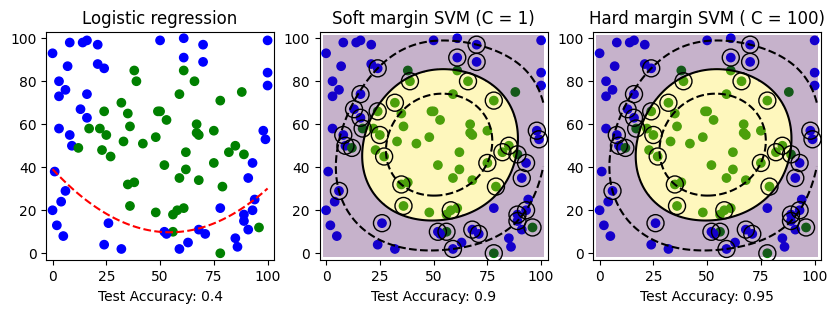

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #Imported SVC as I need a classifier model
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import copy

#used to draw the decision bounary
from sklearn.inspection import DecisionBoundaryDisplay

import numpy as np
import math
import random

#n is the MAX number of samples, the number of samples could be less as repeated points will be discarded
n = 100

#x will be a bunch of random samples with 2 features (so we can visualize)
x = []
y = []

#the radius of which, if the euclidean distance from the center is bigger than 4, the label is 0, otherwise 1
r = 40

#generate random samples with somewhat random binary labels (0, 1)
for i in range(n):
    #generate 2 random integers from the [0, 100]
    x1 = random.randint(0, 100)
    x2 = random.randint(0, 100)

    #if this point was already generated, discard it and pick a new one (skips a sample)
    if [x1, x2] in x:
        continue

    x.append([x1, x2])


    #85% chance to follow the rule (euclidean distance bigger than "r"), otherwise pick the opposite value (outlier / noise)
    if random.random() <= 0.85:
        if math.sqrt((50 - x1) ** 2 + (50 - x2) **2) > r:
            y.append(0)
        else:
            y.append(1)
    else:
        if x1 <= x2:
            y.append(0)
        else:
            y.append(1)

polynomial_lr_degree = 2
lr_x = copy.deepcopy(x)

degree = 2
while degree <= polynomial_lr_degree:
  for index, v in enumerate(x):
    lr_x[index].append(v[0] ** degree)
    lr_x[index].append(v[1] ** degree)
  degree += 1


#split the data into 80% train and 20% test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(lr_x, y, test_size=0.2)

#train a model that uses logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(lr_x_train, lr_y_train)

#predict values for test set
y_pred_LR = logistic_regression.predict(lr_x_test)

print("Logistic Regression performance:")
print(classification_report(y_test, y_pred_LR))

print("\n")

#NOW ONTO SVM

#Soft margin SVM
soft_margin_svm = SVC(C=1, kernel="rbf")
soft_margin_svm.fit(x_train, y_train)

y_pred_soft_SVM = soft_margin_svm.predict(x_test)


print("Soft margin SVM performance:")
print(classification_report(y_test, y_pred_soft_SVM))

print("\n")

#Hard margin SVM
hard_margin_svm = SVC(C=100, kernel="rbf")
hard_margin_svm.fit(x_train, y_train)

y_pred_hard_SVM = hard_margin_svm.predict(x_test)


print("Hard margin SVM performance:")
print(classification_report(y_test, y_pred_hard_SVM))

print("\n")

#create a dictinary to plot it later
plot_var = {}

#a nice function I found online, which breaks down an array of points into different arrays for each coordinate
plot_var["x"], plot_var["y"] = zip(*x)

#create a "color" array in the dictionary to draw each labeled point with a different color
plot_var["c"] = []

for value in y:
    if value == 0:
        plot_var["c"].append("blue")
    else:
        plot_var["c"].append("green")

#let's draw a plot for each model
figure, sub_plt = plt.subplots(1, 3, figsize=(10, 10), )

#lOGISTIC REGRESSION PLOT:
#draw a scatterplot of the points so we can see what's happening, coloring 0 labeled points blue and 1 labeled points green
sub_plt[0].scatter(plot_var["x"], plot_var["y"], c=plot_var["c"])
sub_plt[0].set_aspect('equal', 'box')
sub_plt[0].set(xlim=(-3, 103), ylim=(-3, 103))
sub_plt[0].set_title("Logistic regression")
sub_plt[0].set_xlabel(f"Test Accuracy: {accuracy_score(y_pred_LR, y_test)}")

#get the coefficients and y-intercept to plot the decision boundary
lr_coef = logistic_regression.coef_[0]
lr_intercept = logistic_regression.intercept_

# Decision boundary: θ0 + θ1*x1 + θ2*x2 = 0
# Rearrange to x2 = -(θ0 + θ1*x1) / θ2

#set up the x-axis from min to max
x_vals = np.linspace(np.array(([i[0] for i in x])).min(), np.array(([i[0] for i in x])).max(), 100)
#plot the y values for each x to get the line
y_vals = -(lr_intercept + sum(lr_coef[i * 2] * x_vals ** (i + 1) for i in range(polynomial_lr_degree))) / (sum(lr_coef[(i * 2) + 1] ** (i + 1) for i in range(polynomial_lr_degree)))

sub_plt[0].plot(x_vals, y_vals, 'k--', c="r", label='Decision Boundary')


#SVM (Soft margin):
sub_plt[1].scatter(plot_var["x"], plot_var["y"], c=plot_var["c"])
sub_plt[1].set_aspect('equal', 'box')
sub_plt[1].set(xlim=(-3, 103), ylim=(-3, 103))
sub_plt[1].set_title("Soft margin SVM (C = 1)")
sub_plt[1].set_xlabel(f"Test Accuracy: {accuracy_score(y_pred_soft_SVM, y_test)}")

x = np.array(x)

#shamelessly copy pasting the code from the sklearn documentation
# Plot decision boundary and margins
common_params = {"estimator": soft_margin_svm, "X": x, "ax": sub_plt[1]}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# Plot bigger circles around samples that serve as support vectors
sub_plt[1].scatter(
    soft_margin_svm.support_vectors_[:, 0],
    soft_margin_svm.support_vectors_[:, 1],
    s=150,
    facecolors="none",
    edgecolors="k",
)


#SVM (Hard margin):
sub_plt[2].scatter(plot_var["x"], plot_var["y"], c=plot_var["c"])
sub_plt[2].set_aspect('equal', 'box')
sub_plt[2].set(xlim=(-3, 103), ylim=(-3, 103))
sub_plt[2].set_title("Hard margin SVM ( C = 100)")
sub_plt[2].set_xlabel(f"Test Accuracy: {accuracy_score(y_pred_hard_SVM, y_test)}")

#shamelessly copy pasting the code from the sklearn documentation (again)
# Plot decision boundary and margins
common_params = {"estimator": soft_margin_svm, "X": x, "ax": sub_plt[2]}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# Plot bigger circles around samples that serve as support vectors
sub_plt[2].scatter(
    soft_margin_svm.support_vectors_[:, 0],
    soft_margin_svm.support_vectors_[:, 1],
    s=150,
    facecolors="none",
    edgecolors="k",
)

plt.show()

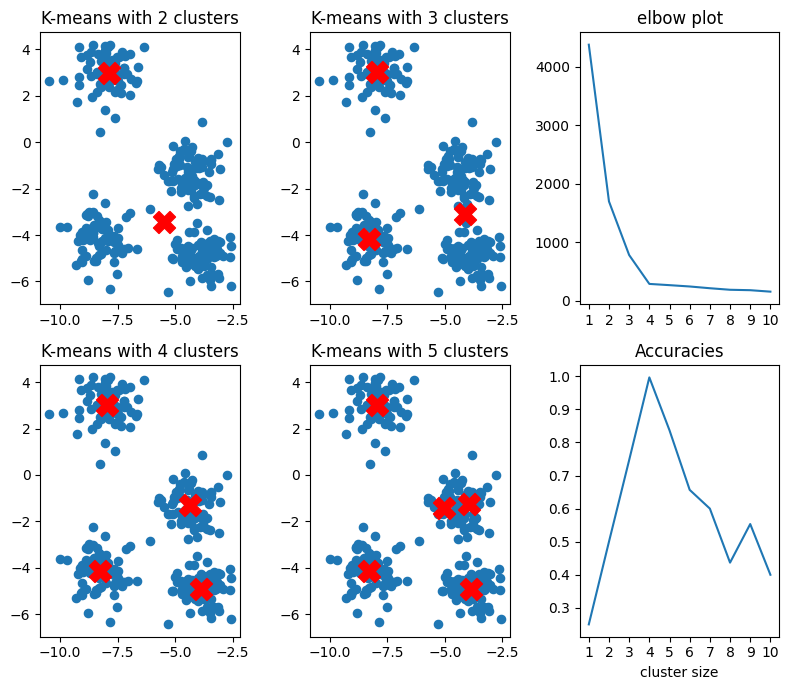

In [ ]:
#sklearn provides a nice function "make_blobs" that generates a nice set of data that are blobs and could be clustered
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d

#number of centers we want to have in our random data
n_centers = 4

# Generate blobs (suppose we don't have y to immitate having unsupervised data)
#there will be 4 clusters of blobs with a standard deviation of 0.65 to make it a bit more challenging for the model
x, y = make_blobs(n_samples=300, centers=n_centers, cluster_std=0.65)

#I will create an array of K-means clusters, the index + 1 is the number of clusters.
#So the K-means at index 0 will have 1 cluster.
#K-means at index 1 will have 2 clusters, etc...

k_means_models = []

#we will have clusters of up to 10
up_to_cluster_size = 10

#this variable is used at the end, when we are about to plot the elbow plot and accuracy plot
#it contains integers, which is the number of clusters
k_values = []

#this is used for plotting the elbow plot, contains wcss values for each k-mean
wcss = []

#this is the accuracy score for each k-means clustering
accuracies = []

for i in range(up_to_cluster_size):
    k_means_model = KMeans(n_clusters=i + 1)
    k_means_model.fit(x)
    k_means_models.append(k_means_model)

    k_values.append(i + 1)
    #for the elbow plot, there is a nice attribute "inertia_" that has the WCSS already calculated for us, we just use that
    wcss.append(k_means_model.inertia_)

    #calculate the accuracy of each model, and see how well it actually did
    #I know this is supposed to be unsupervised, but it's interesting to see the accuracies
    y_pred = k_means_model.predict(x)

    #however, there is a problem, the predicted values may be off but correct (so 2 is always predicted as 1 for example)
    #to fix this, we need to map the values to their corresponding values

    #an array of arrays (where each sub array has 2 numbers, the first number is the original value, the second is the value to change to)
    changes_to_be_made = []

    #pretty weird code but it works (hopefully) :)
    #goes through each of the different values up to the number of centers we have and fixes their values
    for f in range(min(i + 1, n_centers)):
        value_to_change_to = 0
        for index, value in enumerate(y_pred):
            if value == f:
                value_to_change_to = y[index]
        changes_to_be_made.append([f, value_to_change_to])

    for index, value in enumerate(y_pred):
        for change_list in changes_to_be_made:
            if value == change_list[0]:
                y_pred[index] = change_list[1]

    accuracies.append(accuracy_score(y_pred, y))


#I want to plot different k-means plots and then plot the elbow curve
figure, sub_plt = plt.subplots(2, 3, figsize=(8, 7))

#plot the blobs and the centroids for each k-means clustering from 2 to 5

#python starts plotting with 2 clusters up to 2 + 3 = 5, if you want to change it (lets say from 5 to 9) you can change this number to 5
starting_clusters = 2

#some mix of my code and online code to draw 4 different plots
for i in range(4):
    sub_plt[i // 2][i % 2].scatter(x[:, 0], x[:, 1], s=35)
    sub_plt[i // 2][i % 2].scatter(k_means_models[i + starting_clusters - 1].cluster_centers_[:, 0], k_means_models[i + starting_clusters - 1].cluster_centers_[:, 1], s=250, c='red', marker='X')  # Cluster centers
    sub_plt[i // 2][i % 2].set_title(f"K-means with {i + starting_clusters} clusters")



#plot the elbow curve in the first row's last column
sub_plt[0][2].plot(k_values, wcss)
sub_plt[0][2].set_title("elbow plot")
sub_plt[0][2].set_xticks(k_values)

#plot the accuracy of each k-means clustering in the last column of the second row
sub_plt[1][2].plot(k_values, accuracies)
sub_plt[1][2].set_title("Accuracies")
sub_plt[1][2].set_xlabel("cluster size")
sub_plt[1][2].set_xticks(k_values)

plt.tight_layout()
plt.show()

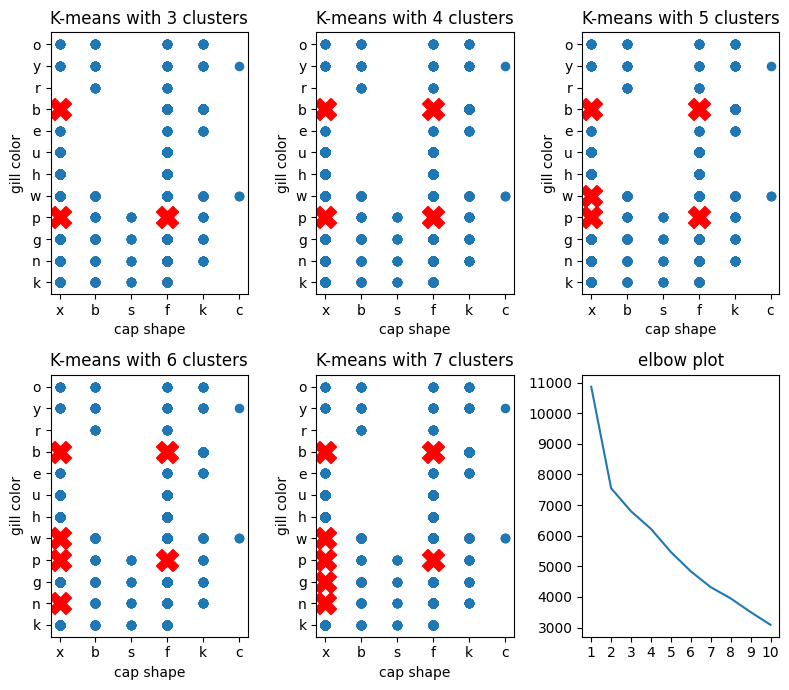

In [ ]:
%pip install kmodes
%pip install ucimlrepo

from kmodes.kmodes import KModes #a lot of Kmodes in here
from ucimlrepo import fetch_ucirepo #the dataset I will be using

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


#I will be using a mushroom dataset, where we have data about a mushroom and want to decide whether it's poisonous or not
#To visualize, I will be taking 2 features out of the many features it has "cap-shape" and "gill-color"

dataset = fetch_ucirepo(id=73)

x = dataset.data.features[["cap-shape", "gill-color"]]

#suppose we don't know this
y = dataset.data.targets

#I copy pasted the following code from 2.py (the k-means code)

k_modes_models = []

#we will have clusters of up to 10
up_to_cluster_size = 10

#this variable is used at the end, when we are about to plot the elbow plot and accuracy plot
#it contains integers, which is the number of clusters
k_values = []

#this is used for plotting the elbow plot, contains wcss values for each k-mean
wcss = []

for i in range(up_to_cluster_size):
    k_means_model = KModes(n_clusters=i + 1)
    k_means_model.fit(x)
    k_modes_models.append(k_means_model)

    k_values.append(i + 1)
    #for the elbow plot, there is a nice attribute "inertia_" that has the WCSS already calculated for us, we just use that
    wcss.append(k_means_model.cost_)

figure, sub_plt = plt.subplots(2, 3, figsize=(8, 7))

#python starts plotting with 2 clusters up to 2 + 3 = 5, if you want to change it (lets say from 5 to 9) you can change this number to 5
starting_clusters = 3

#some mix of my code and online code to draw 4 different plots
for i in range(5):
    sub_plt[i // 3][i % 3].scatter(x["cap-shape"], x["gill-color"], s=35)
    sub_plt[i // 3][i % 3].scatter(k_modes_models[i + starting_clusters - 1].cluster_centroids_[:, 0], k_modes_models[i + starting_clusters - 1].cluster_centroids_[:, 1], s=250, c='red', marker='X')  # Cluster centers
    sub_plt[i // 3][i % 3].set_title(f"K-means with {i + starting_clusters} clusters")
    sub_plt[i // 3][i % 3].set_xlabel("cap shape")
    sub_plt[i // 3][i % 3].set_ylabel("gill color")



#plot the elbow curve in the first row's last column
sub_plt[1][2].plot(k_values, wcss)
sub_plt[1][2].set_title("elbow plot")
sub_plt[1][2].set_xticks(k_values)

plt.tight_layout()
plt.show()

#Interestingly, as we increase k, it seems that the chosen centroids are the exact same, with 1 more extra centroid being added